# RECOVAR visualization and analysis (copied from cryoDRGN's)

This jupyter notebook provides a template for analyzing results, including:
* latent space visualization with PCA/UMAP
* clustering
<!-- * interactive visualization of the latent space, imaging, and pose parameters -->
<!-- * interactive selection of particle images from the latent space -->
<!-- * interactive generation of volumes from the latent space -->

Note that this is a simple template for data analysis, and not a polished UI. Experience with Python/Pandas is recommended.

In [1]:
from importlib import reload
import pandas as pd
import numpy as np
import pickle
import subprocess
import os, sys

from cryodrgn import analysis
from cryodrgn import utils
# from cryodrgn import dataset
from cryodrgn import ctf
                
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from ipywidgets import interact, interactive, HBox, VBox
from scipy.spatial.transform import Rotation as RR
py.init_notebook_mode()
from IPython.display import FileLink, FileLinks

In [2]:
# Enable interactive widgets
# !jupyter nbextension enable --py widgetsnbextension

### Load results

In [56]:
# Specify the result dir
WORKDIR = '..' 
recovar_result_dir = '/home/mg6942/mytigress/uniform/test-new-mask/'
recovar_result_dir = '/home/mg6942/mytigress/uniform/test/'


In [57]:
# Load z
from recovar import output
from recovar import dataset
results = output.load_results_new(recovar_result_dir)
cryos = dataset.load_dataset_from_args(results['input_args'], lazy = True)
z_dim_used = 4#list(results['zs'].keys())[-1]
print("available zdim:", list(results['zs'].keys()), "using:", z_dim_used)
z = results['zs'][z_dim_used]

(INFO) (dataset.py) (21-Oct-23 13:23:09) Loading halfset from file
(INFO) (ctf.py) (21-Oct-23 13:23:09) Image size (pix)  : 128
(INFO) (ctf.py) (21-Oct-23 13:23:09) A/pix             : 6.0
(INFO) (ctf.py) (21-Oct-23 13:23:09) DefocusU (A)      : 26795.69921875
(INFO) (ctf.py) (21-Oct-23 13:23:09) DefocusV (A)      : 26795.69921875
(INFO) (ctf.py) (21-Oct-23 13:23:09) Dfang (deg)       : 0.0
(INFO) (ctf.py) (21-Oct-23 13:23:09) voltage (kV)      : 300.0
(INFO) (ctf.py) (21-Oct-23 13:23:09) cs (mm)           : 2.0
(INFO) (ctf.py) (21-Oct-23 13:23:09) w                 : 0.10000000149011612
(INFO) (ctf.py) (21-Oct-23 13:23:09) Phase shift (deg) : 0.0
(INFO) (ctf.py) (21-Oct-23 13:23:09) Image size (pix)  : 128
(INFO) (ctf.py) (21-Oct-23 13:23:09) A/pix             : 6.0
(INFO) (ctf.py) (21-Oct-23 13:23:09) DefocusU (A)      : 26795.69921875
(INFO) (ctf.py) (21-Oct-23 13:23:09) DefocusV (A)      : 26795.69921875
(INFO) (ctf.py) (21-Oct-23 13:23:09) Dfang (deg)       : 0.0
(INFO) (ctf.py) (

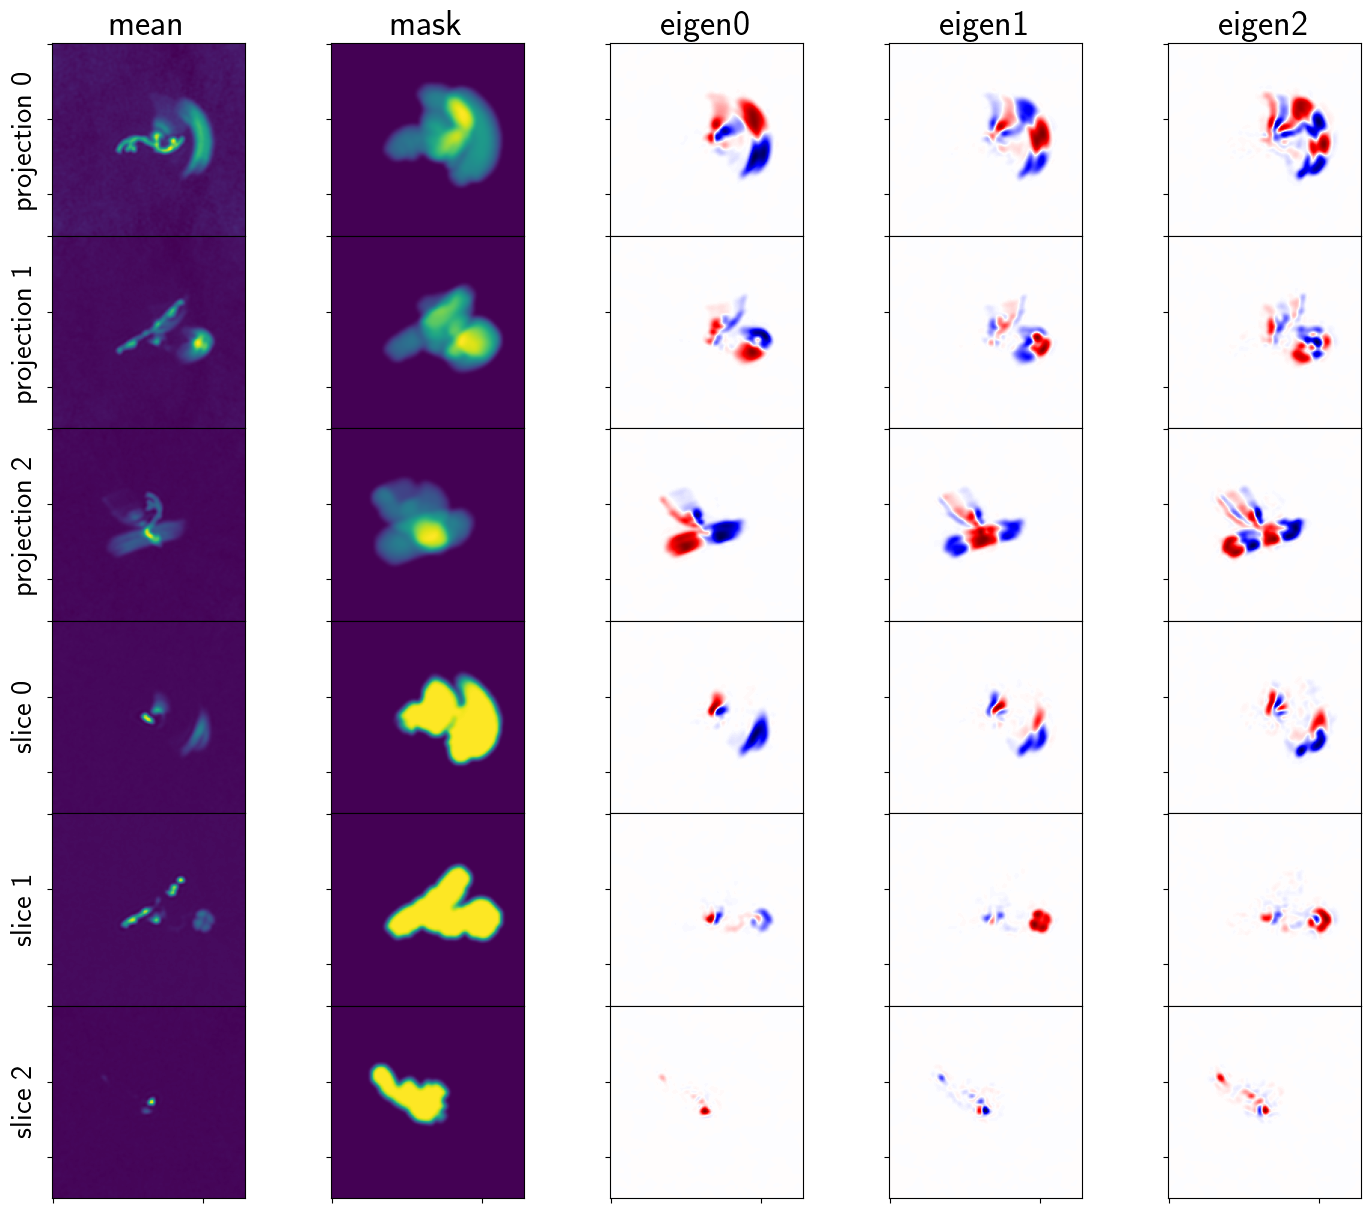

In [58]:
from recovar import plot_utils
reload(plot_utils)
plot_utils.plot_summary(results,cryos)

In [55]:
# s_old = results['s']

In [59]:
results['s']['olds'] = s_old['rescaled']

{}

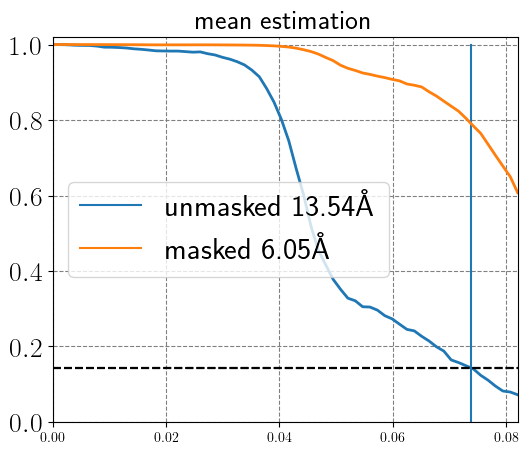

<Figure size 600x500 with 0 Axes>

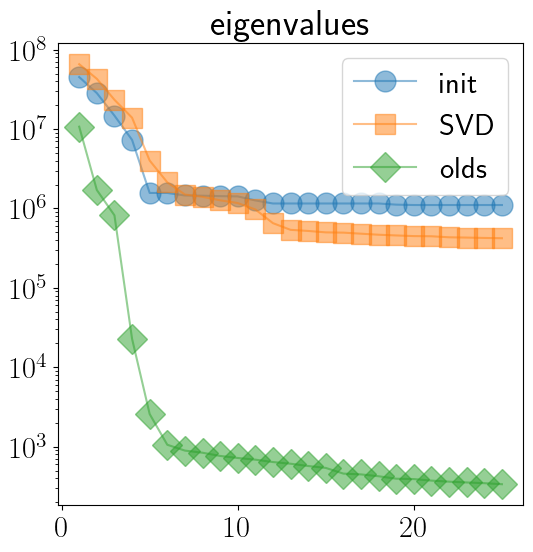

<Figure size 600x600 with 0 Axes>

In [60]:
# Plot FSC of mean, decay of eigenvalues
from recovar import plot_utils
plot_utils.plot_mean_fsc(results, cryos)
plot_utils.plot_cov_results(results['u'], results['s'])



In [37]:
# #valid_idx = cryos[0].get_valid_frequency_indices()
# import synth
# gt_reconstruction = synthetic_dataset.ExperimentReconstruction(cryos[0].grid_size, cryos[0].voxel_size, cryos[0].padding , exp_name, datadir, fake_vol_datadir, label_file = label_file)#, valid_indices = valid_indices)
# u = results['u']
# s = results['s']
# # valid_idx = recovar.get_valid_frequency_indices(cryos[0])
# u['gt'], s['gt'] = gt_reconstruction.get_covariance_eigendecomposition(valid_idx=valid_idx)


In [38]:
# Load UMAP
umap = utils.load_pkl(f'{recovar_result_dir}output/analysis_'+str(z_dim_used)+'/umap_embedding.pkl')
# or run UMAP
# umap = analysis.run_umap(z)

FileNotFoundError: [Errno 2] No such file or directory: '/home/mg6942/mytigress/uniform/test-new-mask/output/analysis_4/umap_embedding.pkl'

/home/mg6942/.conda/envs/recovar2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



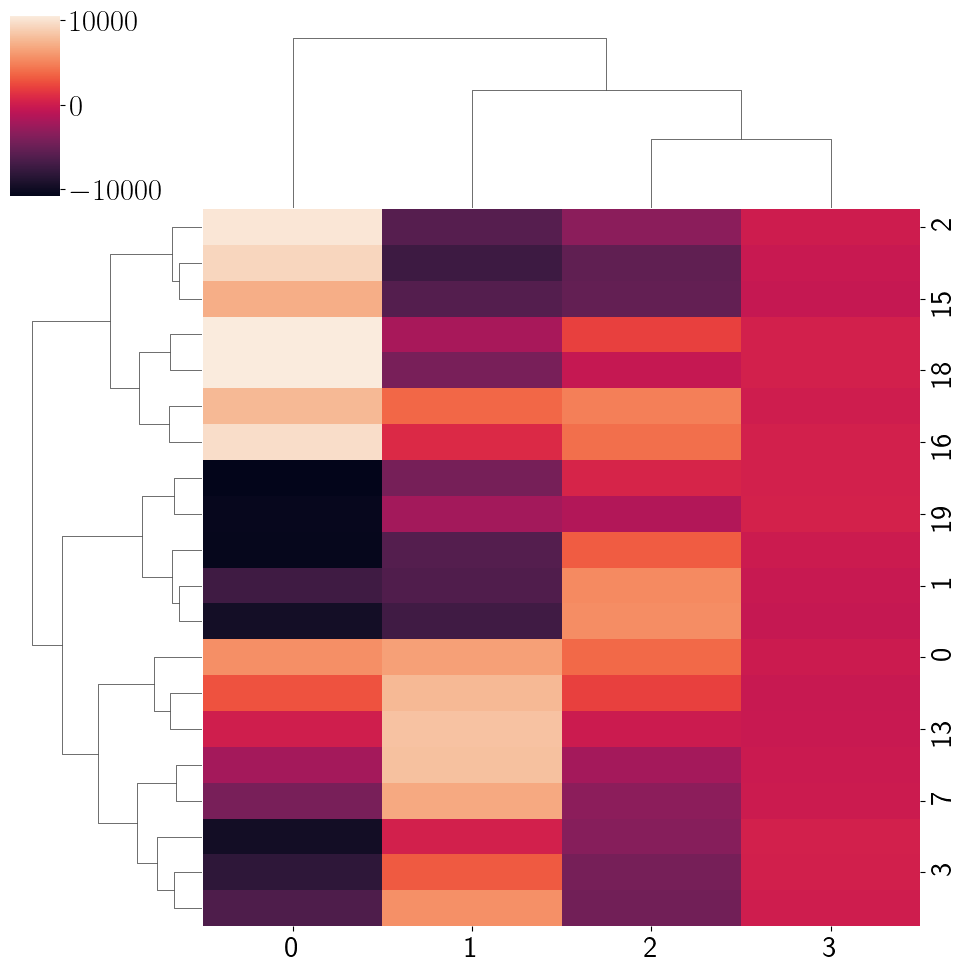

In [39]:
# Load kmeans
# K = 40
# kmeans_labels = utils.load_pkl(f'{WORKDIR}/analyze.{EPOCH}/kmeans{K}/labels.pkl')
# kmeans_centers = np.loadtxt(f'{WORKDIR}/analyze.{EPOCH}/kmeans{K}/centers.txt')
# Or re-run kmeans with the desired number of classes
kmeans_labels, kmeans_centers = analysis.cluster_kmeans(z, 20)

# # Get index for on-data cluster center
kmeans_centers, centers_ind = analysis.get_nearest_point(z, kmeans_centers)

### Load dataset

In [40]:
# Convert rotation matrices to euler angles
rots = np.concatenate([cryo.rotation_matrices for cryo in cryos])
euler = RR.from_matrix(rots).as_euler('zyz', degrees=True)
trans = np.concatenate([cryo.translations for cryo in cryos])
ctf_params = np.concatenate([cryo.CTF_params for cryo in cryos])
ctf.print_ctf_params(ctf_params[0])

(INFO) (ctf.py) (21-Oct-23 13:22:13) Image size (pix)  : 27937
(INFO) (ctf.py) (21-Oct-23 13:22:13) A/pix             : 27937.390625
(INFO) (ctf.py) (21-Oct-23 13:22:13) DefocusU (A)      : 0.0
(INFO) (ctf.py) (21-Oct-23 13:22:13) DefocusV (A)      : 300.0
(INFO) (ctf.py) (21-Oct-23 13:22:13) Dfang (deg)       : 2.0
(INFO) (ctf.py) (21-Oct-23 13:22:13) voltage (kV)      : 0.10000000149011612
(INFO) (ctf.py) (21-Oct-23 13:22:13) cs (mm)           : 0.0
(INFO) (ctf.py) (21-Oct-23 13:22:13) w                 : 0.0
(INFO) (ctf.py) (21-Oct-23 13:22:13) Phase shift (deg) : 1.0


### Learning curve

### PCA

In [41]:
pc, pca = analysis.run_pca(z)

(INFO) (analysis.py) (21-Oct-23 13:22:15) Explained variance ratio:
(INFO) (analysis.py) (21-Oct-23 13:22:15) [0.6016114  0.27594322 0.1215387  0.00090668]


In [42]:
pc = z

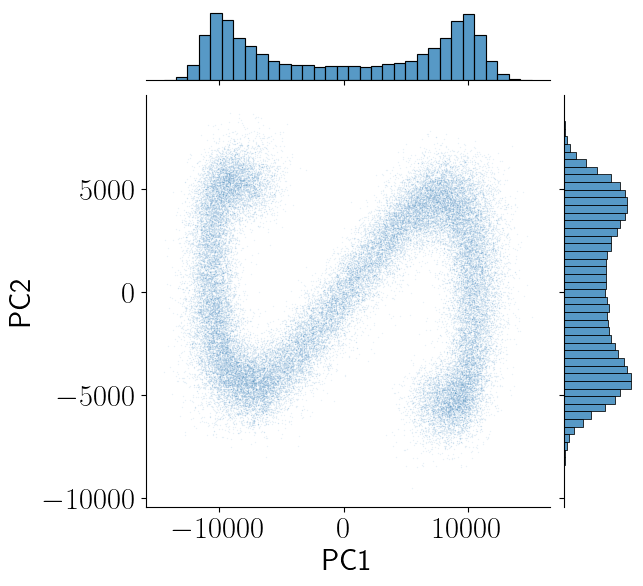

In [43]:
g = sns.jointplot(x=pc[:,0], y=pc[:,2], alpha=.1, s=1)
g.set_axis_labels('PC1', 'PC2')

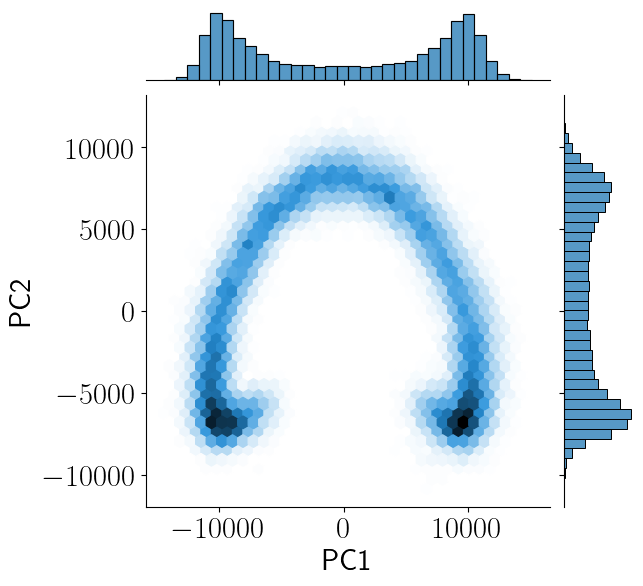

In [44]:
g = sns.jointplot(x=pc[:,0], y=pc[:,1], kind='hex')
g.set_axis_labels('PC1', 'PC2')

Text(0, 0.5, 'explained variance')

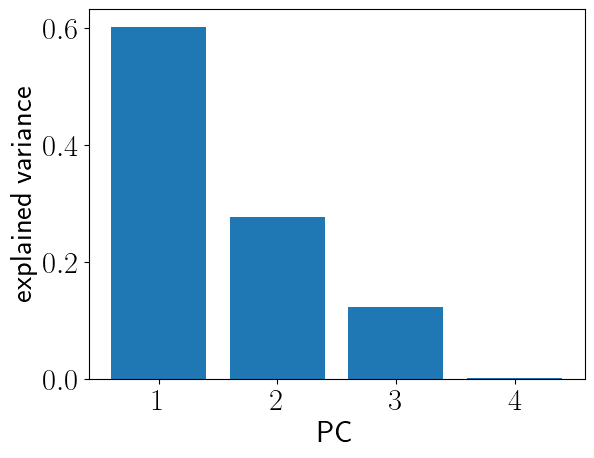

In [45]:
plt.bar(np.arange(z.shape[1])+1,pca.explained_variance_ratio_)
plt.xticks(np.arange(z.shape[1])+1)
plt.xlabel('PC')
plt.ylabel('explained variance')

### View UMAP

In [46]:
g = sns.jointplot(x=umap[:,0], y=umap[:,1], alpha=.1, s=1)
g.set_axis_labels('UMAP1', 'UMAP2')

NameError: name 'umap' is not defined

In [47]:
g = sns.jointplot(x=umap[:,0], y=umap[:,1], kind='hex')
g.set_axis_labels('UMAP1', 'UMAP2')

NameError: name 'umap' is not defined

In [48]:
### View pose distribution

(INFO) (ctf.py) (21-Oct-23 13:22:19) Image size (pix)  : 27937
(INFO) (ctf.py) (21-Oct-23 13:22:19) A/pix             : 27937.390625
(INFO) (ctf.py) (21-Oct-23 13:22:19) DefocusU (A)      : 0.0
(INFO) (ctf.py) (21-Oct-23 13:22:19) DefocusV (A)      : 300.0
(INFO) (ctf.py) (21-Oct-23 13:22:19) Dfang (deg)       : 2.0
(INFO) (ctf.py) (21-Oct-23 13:22:19) voltage (kV)      : 0.10000000149011612
(INFO) (ctf.py) (21-Oct-23 13:22:19) cs (mm)           : 0.0
(INFO) (ctf.py) (21-Oct-23 13:22:19) w                 : 0.0
(INFO) (ctf.py) (21-Oct-23 13:22:19) Phase shift (deg) : 1.0


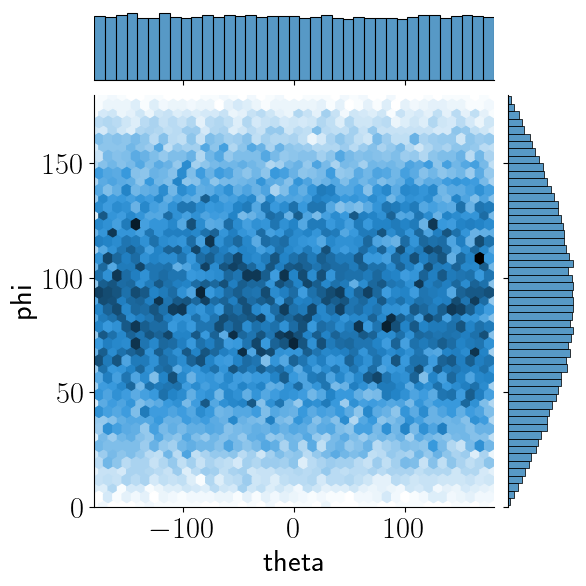

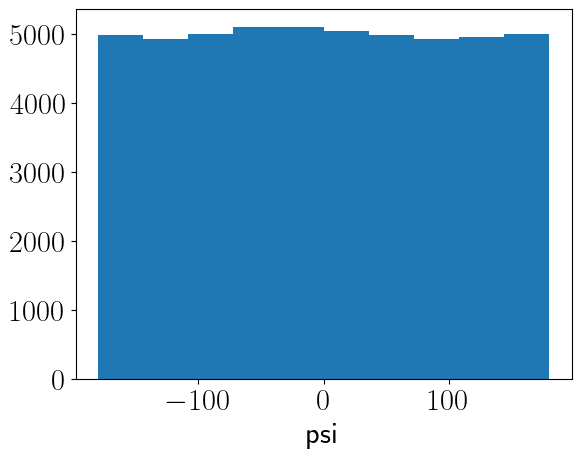

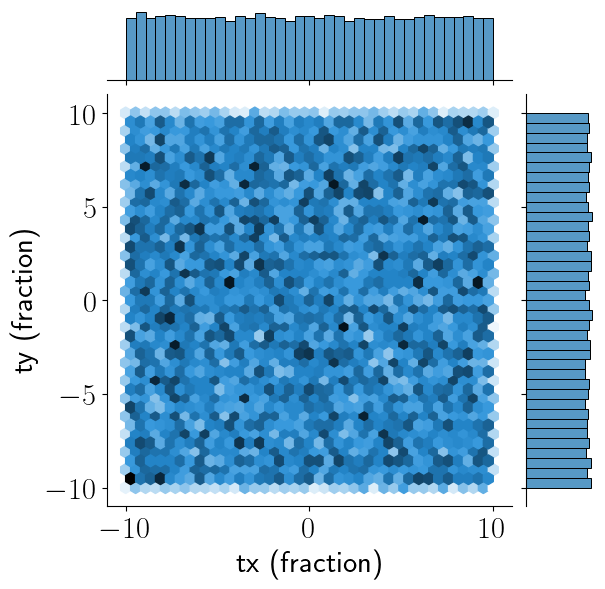

In [49]:
# Convert rotation matrices to euler angles
rots = np.concatenate([cryo.rotation_matrices for cryo in cryos])
euler = RR.from_matrix(rots).as_euler('zyz', degrees=True)
trans = np.concatenate([cryo.translations for cryo in cryos])
ctf_params = np.concatenate([cryo.CTF_params for cryo in cryos])
ctf.print_ctf_params(ctf_params[0])
# rotations
analysis.plot_euler(euler[:,0],euler[:,1], euler[:,2])
sns.jointplot(x=trans[:,0],
              y=trans[:,1],
              kind='hex').set_axis_labels('tx (fraction)','ty (fraction)')

### View K-means clusters

Text(0, 0.5, 'PC2')

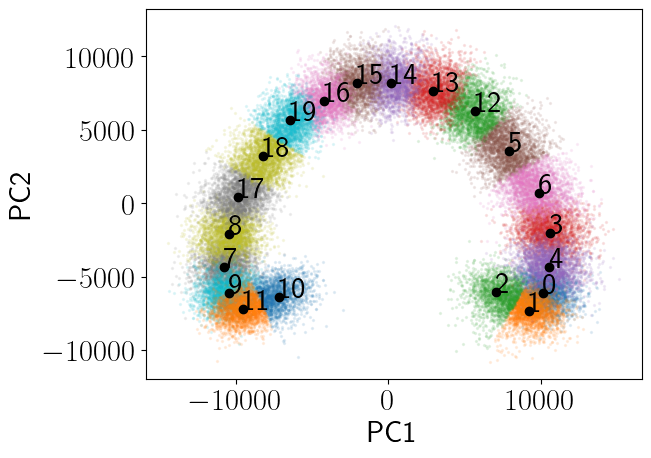

In [50]:
K = len(set(kmeans_labels))
c = pca.transform(kmeans_centers) # transform to view with PCs
analysis.plot_by_cluster(pc[:,0], pc[:,1], K, 
                         kmeans_labels, 
                         centers=c,
                         annotate=True)
plt.xlabel('PC1')
plt.ylabel('PC2')

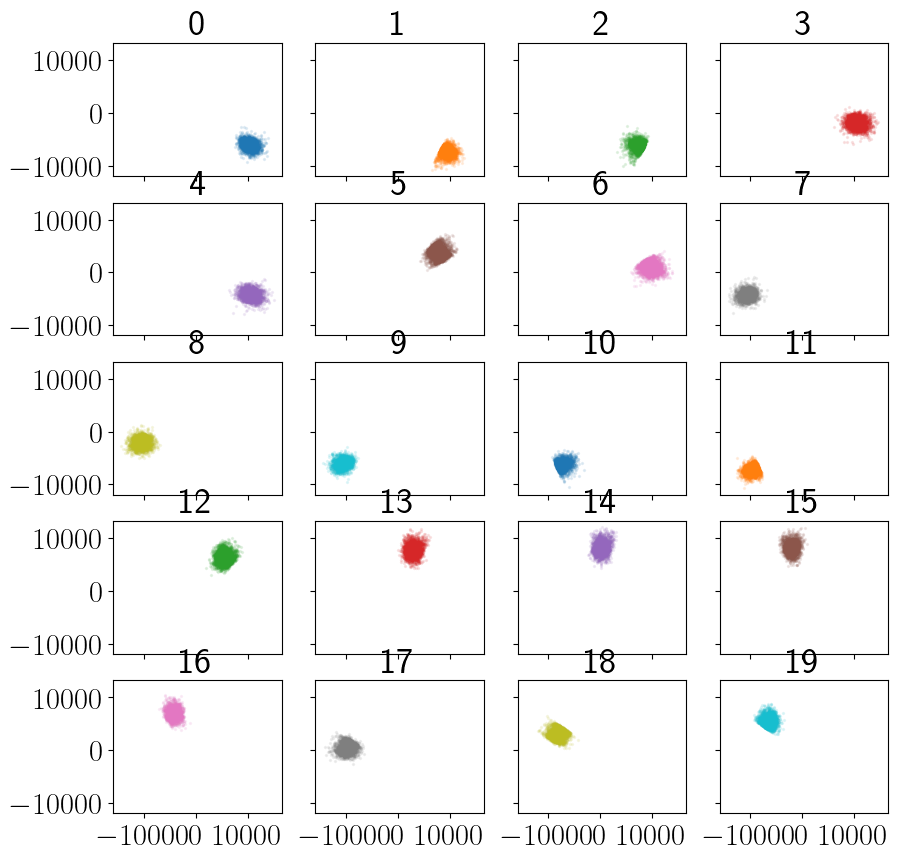

In [51]:
fig, ax = analysis.plot_by_cluster_subplot(pc[:,0], pc[:,1], K, 
                            kmeans_labels)

In [52]:
analysis.plot_by_cluster(umap[:,0], umap[:,1], K, 
                         kmeans_labels, 
                         centers_ind=centers_ind,
                         annotate=True)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

NameError: name 'umap' is not defined

In [53]:
fig, ax = analysis.plot_by_cluster_subplot(umap[:,0], umap[:,1], K, 
                            kmeans_labels)

NameError: name 'umap' is not defined

# Interactive visualization

Interactive visualization of the latent encodings for the trained model. Each point represents a particle image of the dataset. The hover text includes the index of the image in the particle stack. 

### Load into pandas dataframe

In [ ]:
# Load data into a pandas dataframe
df = analysis.load_dataframe(z=z, 
                             pc=pc, 
                             euler=euler, 
                             trans=trans, 
                             labels=kmeans_labels, 
                             umap=umap,
                             df1=ctf_params[:,2],
                             df2=ctf_params[:,3],
                             dfang=ctf_params[:,4],
                             phase=ctf_params[:,8])
df.head()

In [ ]:
# Annotated points correspond to kmeans cluster centers
widget, fig = analysis.ipy_plot_interactive_annotate(df,centers_ind)
VBox((widget,fig))

# Interactive selection

The next two cells contain helper code to select particles using an interactive lasso tool. 

1. In the first cell, select points with the lasso tool. The table widget is dynamically updated with the most recent selection's indices. 
2. Then once you've finalized your selection, use the next cell to save the particle indices for downstream analysis/viz.

(Double click to clear selection)

In [ ]:
widget, fig, ind_table = analysis.ipy_plot_interactive(df)
VBox((widget,fig,ind_table))

In [ ]:
ind_selected = ind_table.data[0].cells.values[0] # save table values
ind_selected = np.array(ind_selected)
ind_selected_not = np.array(sorted(set(np.arange(len(df))) - set(ind_selected)))

print('Selected indices:')
print(ind_selected)
print('Number of selected points:')
print(len(ind_selected))
print('Number of unselected points:')
print(len(ind_selected_not))

### Visualize selected subset

In [ ]:
# View PCA
plt.scatter(pc[:,0], pc[:,1], alpha=.1, s=1)
plt.scatter(pc[ind_selected,0], pc[ind_selected,1], alpha=.1, s=1)
plt.xlabel('PC1 ({:.2f})'.format(pca.explained_variance_ratio_[0]))
plt.ylabel('PC2 ({:.2f})'.format(pca.explained_variance_ratio_[1]))

In [ ]:
# View umap
plt.scatter(umap[:,0], umap[:,1], alpha=.1, s=1)
plt.scatter(umap[ind_selected,0], umap[ind_selected,1], alpha=.1, s=1)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

In [ ]:
# Subset of dataframe
df_sub = df.loc[ind_selected]
df_sub_not = df.loc[ind_selected_not]

In [ ]:
# View pose distribution
analysis.plot_euler(df_sub.theta, df_sub.phi, df_sub.psi)

In [ ]:
widget, fig, ind_table = analysis.ipy_plot_interactive(df_sub)
VBox((widget,fig,ind_table))

In [ ]:
# import plotly
# import numpy as np
# X = np.random.randn(10,3)
# from recovar import plot_utils
# plot_utils.plotly_scatter([X])
# # import plotly.express as px
# # fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
# # fig.write_html('first_figure.html', auto_open=True)


### Save the index selection

The indices for the selected particles may be saved for use in downstream processing in cryoDRGN or with other tools. Within cryoDRGN, selections are saved as an index array in `.pkl` file format. Then, the selected indices can be provided to cryoDRGN with the `--ind` argument to train a new model on a subset of the images. 

Tools are provided in the `utils` subdirectory of the cryoDRGN repo to help convert the index selection to `.star` file format.

**NOTE:** If there are multiple rounds of index filtering performed on the same particle stack (i.e. your results come from a training run that already uses an --ind subselection), the index selection must be converted into the correct indices into the original dataset.

In [ ]:
#SAVE_PATH = f'{WORKDIR}/ind_selected.pkl' # RENAME ME

## IMPORTANT: convert index selection to original particles indices if current results have already been filtered

#if ind_orig is not None:
#    ind_selected_orig = analysis.convert_original_indices(ind_selected, N_orig, ind_orig)
#    utils.save_pkl(ind_selected_orig, SAVE_PATH)

#else:
#    utils.save_pkl(ind_selected, SAVE_PATH)

# View particles

View images at selected points in latent space

In [ ]:
particle_ind = ind_selected # or set to custom selection

In [ ]:
# choose 9 particles to view at random
if len(particle_ind) > 9:
    ind_subset9 = np.random.choice(particle_ind, 9, replace=False)
else: 
    ind_subset9 = particle_ind
print(ind_subset9)

In [ ]:
particle_ind

In [ ]:
p = [cryos[0].get_image_real(ii % cryos[0].n_images) for ii in ind_subset9]
analysis.plot_projections(p, ind_subset9)
widget, fig = analysis.ipy_plot_interactive_annotate(df, ind_subset9, opacity=.1)
VBox((widget,fig))

# Generate volumes

Generate volumes at selected points in latent space

In [ ]:
vol_ind = [] # ADD INDICES HERE
print(vol_ind)

In [ ]:
widget, fig = analysis.ipy_plot_interactive_annotate(df, vol_ind, opacity=.1)
VBox((widget,fig))

In [ ]:
def get_outdir():
    '''Helper function to get a clean directory to save volumes'''
    for i in range(100000):
        outdir = f'reconstruct_{i:06d}'
        if os.path.exists(outdir): continue
        else: break
    return outdir

def generate_volumes(zvalues, outdir, **kwargs):
    '''Helper function to call cryodrgn eval_vol and generate new volumes'''
    if not os.path.exists(outdir):
        os.mkdir(outdir)
    np.savetxt(f'{outdir}/zfile.txt', zvalues)
    analysis.gen_volumes(f'{WORKDIR}/weights.{EPOCH}.pkl',
                         f'{WORKDIR}/config.pkl',
                         f'{outdir}/zfile.txt',
                         f'{outdir}', **kwargs)
    return FileLinks(f'{outdir}/')

In [ ]:
# # Get a unique output directory, or define your own
# outdir = get_outdir()
# print(os.path.abspath(outdir))

In [ ]:
# Modify any defaults for volume generation -- see `cryodrgn eval_vol -h` for details 
Apix = 1 # Set to volume pixel size
flip = False # Hand flip?
invert = False # Invert contrast?
downsample = None # Set to smaller box size if desired
cuda = None # specify cuda device

generate_volumes(z[vol_ind], outdir, Apix=cryos[0].voxel_size, flip=flip, downsample=downsample, cuda=cuda, invert=invert)